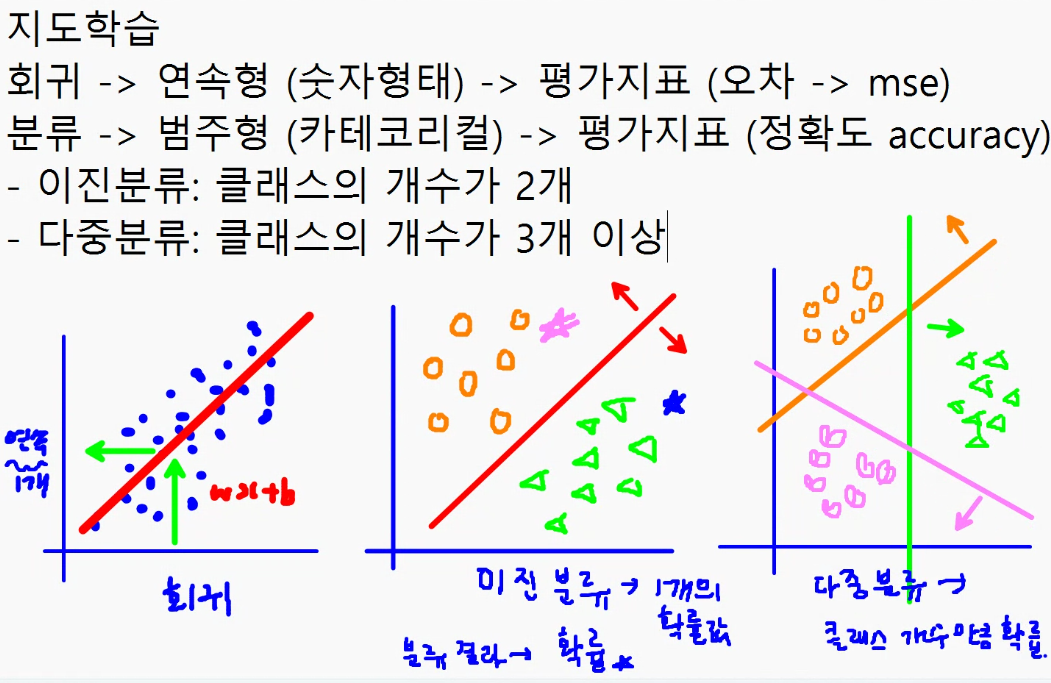

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 분류해내는 모델링 실습
- 이진분류 실습
- sklearn에서 제공하는 load_breast_cancer 유방암데이터를 활용해보자~

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer # 사이킷런 내장 유방암 데이터

In [6]:
data = load_breast_cancer()
print(data)
# sklean 에서 제공하는 데이터 형태 -> 번치객체
# 활용방법은 딕셔너리와 동일

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [7]:
data.keys()
# data : 문제데이터, 입력특성
# target : 정답데이터
# target_names : 정답데이터의 이름
# feature_names : 특성의 이름(컬럼명)
# DESCR : 데이터에 대한 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data['target_names']
# 'malignant' : 악성 0
# 'benign' : 양성 1

array(['malignant', 'benign'], dtype='<U9')

In [9]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
# 데이터 분리
# 1. 문제와 정답
X = data['data']
y = data['target']
# 2. train, test -> random_state = 93, test : 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=93)

In [11]:
print(X_train, y_train)
print(X_test, y_test)

[[6.981e+00 1.343e+01 4.379e+01 ... 0.000e+00 2.932e-01 9.382e-02]
 [9.876e+00 1.727e+01 6.292e+01 ... 5.588e-02 2.989e-01 7.380e-02]
 [1.171e+01 1.719e+01 7.468e+01 ... 1.099e-01 2.572e-01 7.097e-02]
 ...
 [1.127e+01 1.550e+01 7.338e+01 ... 8.272e-02 2.157e-01 1.043e-01]
 [1.476e+01 1.474e+01 9.487e+01 ... 1.251e-01 3.109e-01 8.187e-02]
 [1.469e+01 1.398e+01 9.822e+01 ... 1.108e-01 2.827e-01 9.208e-02]] [1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 

### 모델링
1. 신경망 모델 구조 설계
- 입력층, 중간층, 출력층
2. 신경망 모델 학습방법, 평가방법 설정
- compile : 회귀 이진분류, 다중분류 인지에 따라 학습 방법, 평가방법을 다르게 설정
3. 모델 학습
4. 모델 예측 평가

In [12]:
# 모델 생성을 위한 라이브러리 불러오기
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense

In [13]:
# 뼈대
model = Sequential()
# 입력층
model.add(InputLayer(shape=(30,)))
# 중간층(은닉층) -> 층을 여러층을 쌓음
# 퍼셉트론 = 선형모델 + 활성화 함수(역치)
model.add(Dense(units=8, activation= 'sigmoid'))
model.add(Dense(units=16, activation= 'sigmoid'))
model.add(Dense(units=8, activation= 'sigmoid'))
# 출력층 : 출력하고자 하는 데이터의 형태를 지정
model.add(Dense(units=1, activation= 'sigmoid')) # ⭐⭐⭐⭐⭐
# 이진분류 : 1개의 확률값(양성클래스 인지 아닌지) -> 0~1사이의 값으로 출력
# 50%를 기준으로 이상이면 양성클래스 미만이면 음성클래스
# 하나의 선형모델과 sigmoid를 합쳐서 사용
# 출력층에서의 sigmoid 함수 역할 : 출력결과 0~1 사이의 확률값으로 변환 출력

In [14]:
# 모델 학습 평가방법 설정
# loss(학습시 사용하는 오차), optumizer(최적화 함수), metrics(평가지표)
model.compile(loss='binary_crossentropy', # 이진분류이기 때문에 binary_crossentropy 사용
                optimizer='adam',
                metrics=['accuracy']) # 평가지표 -> 정확도

In [15]:
# 모델 학습
model_history = model.fit(X_train,y_train, validation_split=0.2,epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4057 - loss: 0.8075 - val_accuracy: 0.2674 - val_loss: 0.8567
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3927 - loss: 0.7811 - val_accuracy: 0.2674 - val_loss: 0.8098
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3908 - loss: 0.7532 - val_accuracy: 0.2674 - val_loss: 0.7713
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3636 - loss: 0.7393 - val_accuracy: 0.2674 - val_loss: 0.7409
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3871 - loss: 0.7155 - val_accuracy: 0.2674 - val_loss: 0.7173
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3755 - loss: 0.7043 - val_accuracy: 0.2674 - val_loss: 0.6977
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4685 - loss: 0.6936 - val_accuracy: 0.7326 - val_loss: 0.6826
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5582 - loss: 0.6891 - val_accuracy: 0.7326 - 

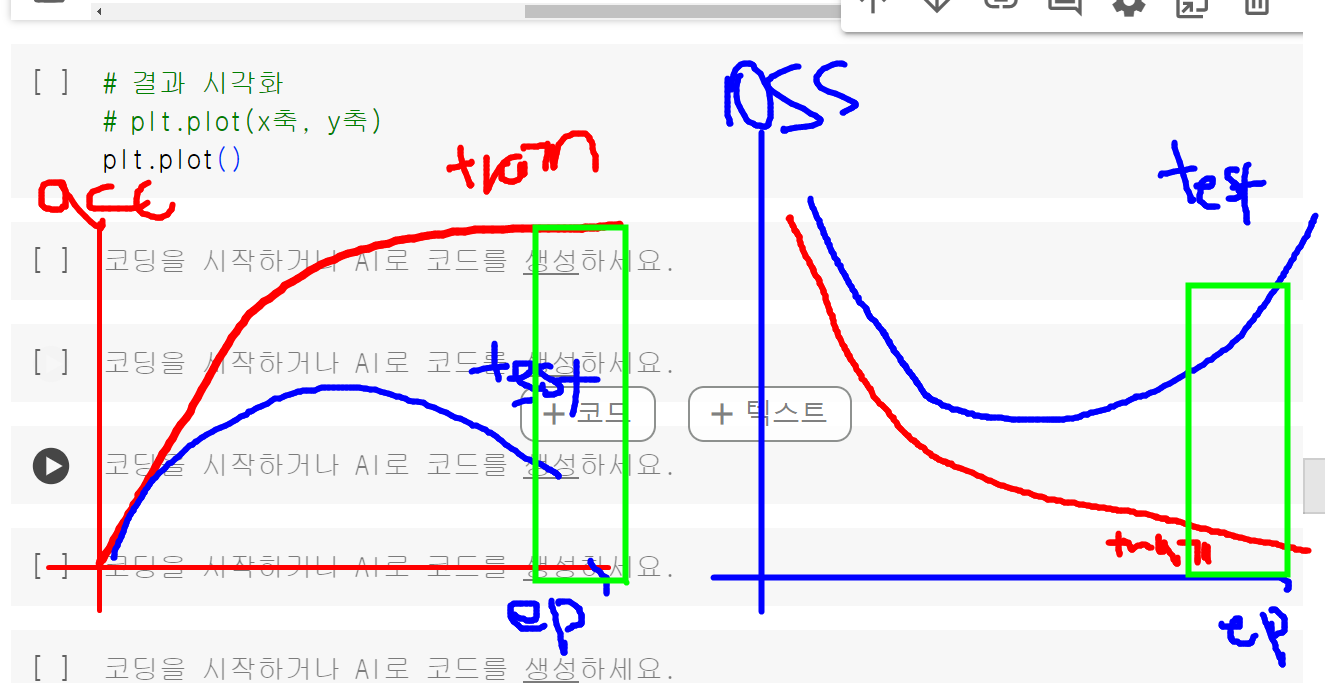

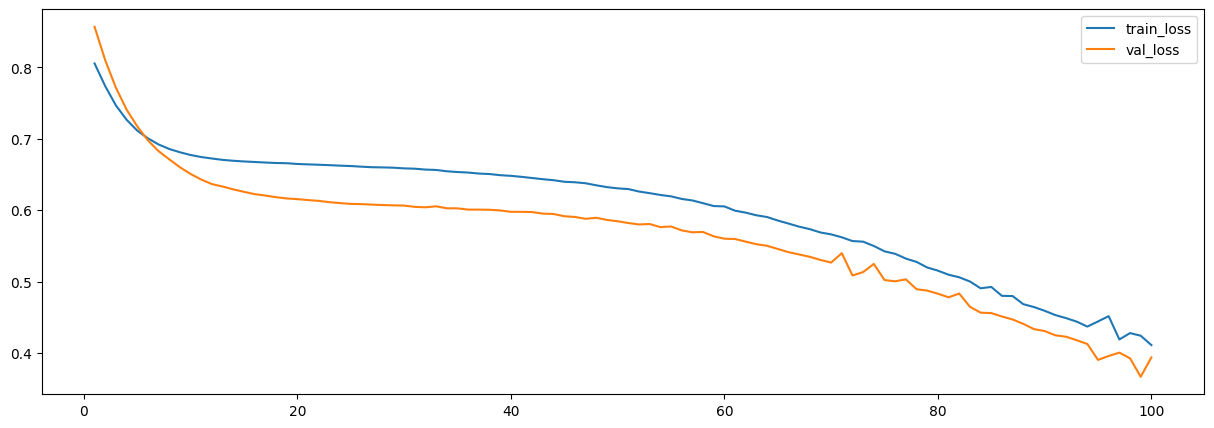

In [24]:
# 결과 시각화
# 그래프 크기조절
plt.figure(figsize=(15,5)) # 가로 세로
# plt.plot(x축, y축)
plt.plot(range(1,101), model_history.history['loss'], label = 'train_loss')
plt.plot(range(1,101), model_history.history['val_loss'], label = 'val_loss' )
plt.legend() # 범례 표시 -> 표식
plt.show()